In [2]:
from sklearn.externals import joblib
import seaborn as sns
sns.set_context("paper", rc={"font.size":150, "axes.titlesize":15, "axes.labelsize":15})   
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter, defaultdict
import scipy
import pprint
import sparse
import os
import glob

# check model

In [10]:
def check_model(exp_names, task_dir, runnames, no_cohort_specific=True, verbose=True):
    '''
    check the result of models
    returns result, val_best_names, val_best
    where result is a df after choosing among validations
    '''
    pds = {}
    for exp_name in exp_names:
        pd_dict = {}
        for run in runnames: 
            try: # figure out what's wrong with somd of the runs
                fn = os.path.join(
                        task_dir,
                        'logs/results/test_auc_on_{}_single_{}.npy'.format(run, exp_name))
                pd_dict[run] = np.load(fn)
                if no_cohort_specific:
                    pd_dict[run] = pd_dict[run][-1:]
            except:
                print("{} missing run {}".format(exp_name, run))
                continue

        df = pd.DataFrame.from_dict(pd_dict)
        df = df.rename({len(pd_dict[0])-1: 'micro auc'}, axis='index')    
        pds[exp_name] = df.transpose()

    for exp_name in exp_names:
        if verbose:
            print('\n' + exp_name)
            print(pds[exp_name].describe().round(3))
    
    ### second part: choose from best validation 
    pd_dict = {}
    val_best = {}
    val_best_name = {}
    for exp_name in exp_names:
        for run in runnames:
            val_fn = os.path.join(
                        task_dir,
                        'logs/results/val_auc_on_{}_single_{}.npy'.format(run, exp_name))                
            test_fn = os.path.join(
                         task_dir,
                         'logs/results/test_auc_on_{}_single_{}.npy'.format(run, exp_name))                
            
            try: # figure out what's wrong with some of the runs
                val_micro_auc = np.load(val_fn)[-1]
                np.load(test_fn)
            except:
                print("{} missing run {}".format(exp_name, run))
                continue

            if not val_best.get(exp_name) or val_best[exp_name] < val_micro_auc:
                val_best[exp_name] = val_micro_auc
                val_best_name[exp_name] = test_fn

                pd_dict[exp_name] = np.load(val_best_name[exp_name])
                if no_cohort_specific:
                    pd_dict[exp_name] = pd_dict[exp_name][-1:]

    df = pd.DataFrame.from_dict(pd_dict)
    df = df.rename({len(df.index)-1: 'micro auc'}, axis='index')    
    return df, val_best_name, val_best    

In [134]:
exp_names = ['moe_exp', 'global_exp', 
             'mtl_od', 'mtl_oi', 
             'mtl_val_curve', 'snapshot_val_curve',
             'snapshot_od', 'snapshot_oi']
task_dir = 'eicu_mixture_of_experts_project/mortality/'
runnames = list(range(30))
result, val_best_name, val_best = check_model(exp_names, task_dir, runnames)

pprint.pprint(val_best)
pprint.pprint(val_best_name)
print(task_dir)
result.round(3)

mtl_oi missing run 12
mtl_oi missing run 13
mtl_oi missing run 14
mtl_oi missing run 15
mtl_oi missing run 16
mtl_oi missing run 17
mtl_oi missing run 18
mtl_oi missing run 19
mtl_oi missing run 20
mtl_oi missing run 21
mtl_oi missing run 22
mtl_oi missing run 23
mtl_oi missing run 24
mtl_oi missing run 25
mtl_oi missing run 26
mtl_oi missing run 27
mtl_oi missing run 28
mtl_oi missing run 29
mtl_val_curve missing run 3
mtl_val_curve missing run 26
snapshot_val_curve missing run 3
snapshot_val_curve missing run 6
snapshot_val_curve missing run 26
snapshot_oi missing run 12
snapshot_oi missing run 13
snapshot_oi missing run 14
snapshot_oi missing run 15
snapshot_oi missing run 16
snapshot_oi missing run 17
snapshot_oi missing run 18
snapshot_oi missing run 19
snapshot_oi missing run 20
snapshot_oi missing run 21
snapshot_oi missing run 22
snapshot_oi missing run 23
snapshot_oi missing run 24
snapshot_oi missing run 25
snapshot_oi missing run 26
snapshot_oi missing run 27
snapshot_oi mis

,global_exp,moe_exp,mtl_od,mtl_oi,mtl_val_curve,snapshot_od,snapshot_oi,snapshot_val_curve
micro auc,0.849,0.847,0.839,0.846,0.839,0.845,0.846,0.814


In [8]:
exp_names = ['moe_exp', 'global_exp', 
             'mtl_od', #'mtl_oi', 
             'mtl_val_curve', 'snapshot_val_curve',
             'snapshot_od', #'snapshot_oi'
            ]
task_dir = 'eicu_mixture_of_experts_project/ARF4/'
runnames = list(range(30))
result, val_best_name, val_best = check_model(exp_names, task_dir, runnames)

pprint.pprint(val_best)
pprint.pprint(val_best_name)
print(task_dir)
result.round(3)

mtl_od missing run 10
mtl_od missing run 11
mtl_od missing run 12
mtl_od missing run 13
mtl_od missing run 14
mtl_od missing run 15
mtl_od missing run 16
mtl_od missing run 17
mtl_od missing run 18
mtl_od missing run 19
mtl_od missing run 20
mtl_od missing run 21
mtl_od missing run 22
mtl_od missing run 23
mtl_od missing run 24
mtl_od missing run 25
mtl_od missing run 26
mtl_od missing run 27
mtl_od missing run 28
mtl_od missing run 29

moe_exp
       micro auc
count     30.000
mean       0.804
std        0.027
min        0.735
25%        0.806
50%        0.817
75%        0.819
max        0.824

global_exp
       micro auc
count     30.000
mean       0.810
std        0.022
min        0.729
25%        0.813
50%        0.817
75%        0.820
max        0.825

mtl_od
       micro auc
count     10.000
mean       0.787
std        0.015
min        0.763
25%        0.780
50%        0.790
75%        0.796
max        0.809
mtl_od missing run 10
mtl_od missing run 11
mtl_od missing run 12
mtl_od

,global_exp,moe_exp,mtl_od
micro auc,0.825,0.824,0.809


In [141]:
exp_names = ['moe_exp', 'global_exp', 
             'mtl_od', #'mtl_oi', 
             'mtl_val_curve', 'snapshot_val_curve',
             'snapshot_od', #'snapshot_oi'
            ]
task_dir = 'eicu_mixture_of_experts_project/Shock4/'
runnames = list(range(30))
result, val_best_name, val_best = check_model(exp_names, task_dir, runnames)

pprint.pprint(val_best)
pprint.pprint(val_best_name)
print(task_dir)
result.round(3)

mtl_val_curve missing run 6
mtl_val_curve missing run 9
mtl_val_curve missing run 15
snapshot_val_curve missing run 6
snapshot_val_curve missing run 9
snapshot_val_curve missing run 15

moe_exp
       micro auc
count     30.000
mean       0.838
std        0.066
min        0.500
25%        0.849
50%        0.853
75%        0.857
max        0.861

global_exp
       micro auc
count     30.000
mean       0.851
std        0.008
min        0.815
25%        0.849
50%        0.852
75%        0.857
max        0.861

mtl_od
       micro auc
count     30.000
mean       0.829
std        0.022
min        0.774
25%        0.825
50%        0.839
75%        0.842
max        0.847

mtl_val_curve
       micro auc
count     27.000
mean       0.816
std        0.070
min        0.500
25%        0.798
50%        0.846
75%        0.852
max        0.859

snapshot_val_curve
       micro auc
count     27.000
mean       0.796
std        0.027
min        0.740
25%        0.784
50%        0.796
75%        0.803
max

,global_exp,moe_exp,mtl_od,mtl_val_curve,snapshot_od,snapshot_val_curve
micro auc,0.859,0.857,0.847,0.839,0.844,0.842


# small pct models

In [30]:
exp_names = ['pct{}_0_moe_exp', 'pct{}_0_global_exp', 
             #'mtl_od', 'mtl_oi', 
             #'mtl_val_curve', 'snapshot_val_curve',
             #'snapshot_od', 'snapshot_oi'
            ]
task_dir = 'eicu_mixture_of_experts_project/mortality/'
runnames = list(range(30))

results = []
pcts = [1, 5, 10, 20, 30]
for pct in pcts:
    new_exp_names = [exp_name.format(pct) for exp_name in exp_names]
    result, val_best_name, val_best = check_model(new_exp_names, task_dir, runnames, verbose=False)
    # pprint.pprint(val_best)
    # pprint.pprint(val_best_name)
    # print(task_dir)
    # print(result.round(3))
    results.append(result.values.ravel())

results = pd.DataFrame(np.array(results))
results = results.rename(dict((i, p) for i,p in enumerate(pcts)), axis=0)
results = results.rename(dict((i, m.split('pct')[1].split('_')[2]) for i, m in enumerate(exp_names)), axis=1)
results.round(3)

,moe,global
1,0.756,0.752
5,0.788,0.791
10,0.803,0.803
20,0.819,0.817
30,0.828,0.830


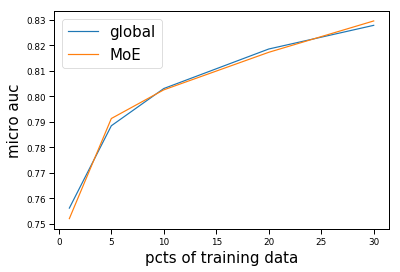

In [32]:
plt.plot(pcts, results.values[:, 0], label='global')
plt.plot(pcts, results.values[:, 1], label='MoE')
plt.legend(fontsize=15)
plt.xlabel('pcts of training data', fontsize=15)
plt.ylabel('micro auc', fontsize=15)
plt.show()

# generating random subset of data

In [90]:
def generate_pct_data(pct, task_dir, num_runs):
    '''
    Given 'eicu_mixture_of_experts_project/eICU_data/mortality/'
    Save in 'eicu_mixture_of_experts_project/eICU_data/mortality/pct_{pct}_train_indices/'
    '''
    np.random.seed(42)    
    pct = int(pct)
    assert pct > 0 and pct <= 100, "pct need to be in (0, 100]"
    assert os.path.exists(os.path.join(task_dir, 'data')), "{} does not exist".format(os.path.join(task_dir, 'data'))
    
    os.system('mkdir -p {}/pct_{}_train_indices'.format(task_dir, pct))
    train_choices = joblib.load(task_dir + '/train_idx.pkl')
    n_new = int(len(train_choices) * pct / 100)
    for i in range(num_runs):
        indices = np.random.choice(train_choices, size=n_new, replace=False)
        save_fn = "{}/pct_{}_train_indices/{}.pkl".format(task_dir, pct, i)
        joblib.dump(indices, save_fn)
    
task_dir = 'eicu_mixture_of_experts_project/eICU_data/mortality'
for pct in [1, 5, 10, 20, 30]:
    generate_pct_data(pct, task_dir, 30)

# plot logs

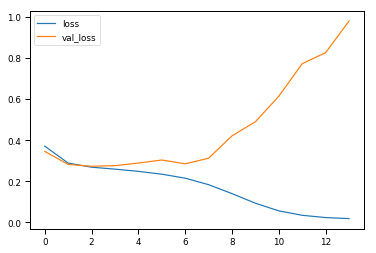

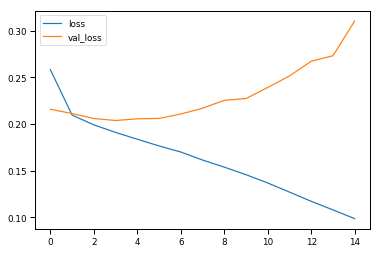

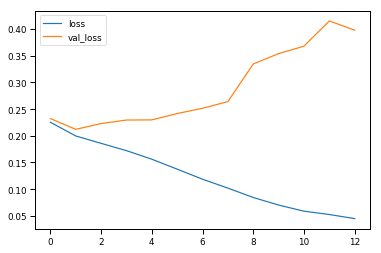

In [63]:
def plot_log(fn):
    logs = joblib.load(fn)
    loss = [item['loss'] for item in logs]
    val_loss = [item['val_loss'] for item in logs]
    plt.plot(loss, label='loss')
    plt.plot(val_loss, label='val_loss')
    plt.legend()
    plt.show()
        
plot_log('eicu_mixture_of_experts_project/mortality/logs/checkpoints/2_global_exp/log')
plot_log('eicu_mixture_of_experts_project/ARF4/logs/checkpoints/9_global_exp/log')
plot_log('eicu_mixture_of_experts_project/Shock4/logs/checkpoints/6_global_exp/log')

# check data

In [2]:
save_data_path = "mixture_of_experts_project/data/mortality_24/"
X = np.load(save_data_path + 'X.npy')
# jw: need to allow_pickle=True                                                                                                                                                                                 
careunits = np.load(save_data_path + 'careunits.npy', allow_pickle=True)
saps_quartile = np.load(save_data_path + 'saps_quartile.npy')
subject_ids = np.load(save_data_path + 'subject_ids.npy')
Y = np.load(save_data_path + 'Y.npy')

pd_dict = {}
all_tasks = sorted(np.unique(careunits))
for task in all_tasks:
    subset = (careunits == task)
    n_samples = sum(subset)
    n_pos_samples = sum(Y[subset])
    pd_dict[task] = {'N': n_samples, 'n': n_pos_samples, 'Class Imbalance': float(n_pos_samples) / n_samples}

df = pd.DataFrame.from_dict(pd_dict).T
df2 = pd.DataFrame.from_dict({'Overall': {'N': len(Y), 'n': sum(Y), 'Class Imbalance': float(sum(Y)) / len(Y)}}).T
df = df.append(df2)
df[['N', 'n']].astype(int)

,N,n
CCU,4888,340
CSRU,6977,136
MICU,11429,1120
SICU,5183,398
TSICU,4234,284
Overall,32711,2278


# inspect hyperparameters

In [111]:
def get_val_dfs(exp_names=['moe_exp', 'global_exp'], 
                task_dir='mixture_of_experts_project/result', 
                runnames=range(10)):
    # get validation performance
    pds = {}
    for exp_name in exp_names:
        pd_dict = {}
        for run in runnames:
            pd_dict[run] = np.load(os.path.join(
                task_dir,
                'logs/results/val_auc_on_{}_single_{}.npy'.format(run, exp_name)))
            pd_dict[run] = pd_dict[run][-1:] # only use the micro auc
        df = pd.DataFrame.from_dict(pd_dict)
        df = df.rename({len(df.index)-1: 'micro auc'}, axis='index')
        pds[exp_name] = df.transpose()

    return pds

def get_settings_df(task_dir='mixture_of_experts_project/result'):
    # plot partial dependence of all the hyper-parameters, based on validation performance
    fn = os.path.join(task_dir, 'settings/cluster_model_settings.pkl')
    cluster_settings, model_settings = joblib.load(fn)
    pd_dict = defaultdict(lambda: np.zeros(len(cluster_settings)))
    for i, setting in enumerate(zip(cluster_settings, model_settings)):
        cluster_setting, model_setting = setting

        for arg in cluster_setting:
            if type(arg) in [list, tuple]:
                k, v = arg
            else:
                k, v = arg, 1
            if k.startswith('--'):
                k = k[2:]
            elif k.startswith('-'):
                k = k[1:]

            if k == 'lr':
                k = 'log_lr'
                v = np.log10(v)
            if k == 'wd':
                k = 'log_wd'
                v = np.log10(v)
            if type(v) is str: continue
            pd_dict['cluster_' + str(k)][i] = v

        for arg in model_setting:
            if type(arg) in [list, tuple]:
                k, v = arg
            else:
                k, v = arg, 1
            if k.startswith('--'):
                k = k[2:]
            elif k.startswith('-'):
                k = k[1:]

            if k == 'lr':
                k = 'log_lr'
                v = np.log10(v)
            if k == 'wd':
                k = 'log_wd'
                v = np.log10(v)
            if type(v) is str: continue
            pd_dict['model_' + str(k)][i] = v

    settings_df = pd.DataFrame.from_dict(pd_dict)
    return settings_df

def plot_hp_dependence(val_dfs, settings_df, exp_name):
    plt.figure(figsize=(20,20))
    for i, c in enumerate(settings_df.columns):
        n = int(np.ceil(np.sqrt(len(settings_df.columns))))
        plt.subplot(n, n, i+1)
        idx = val_dfs[exp_name]['micro auc'].index
        sns.regplot(x=settings_df[c][idx], y=val_dfs[exp_name]['micro auc'], fit_reg=True)
        # plt.tight_layout()
    plt.show()

mtl_od


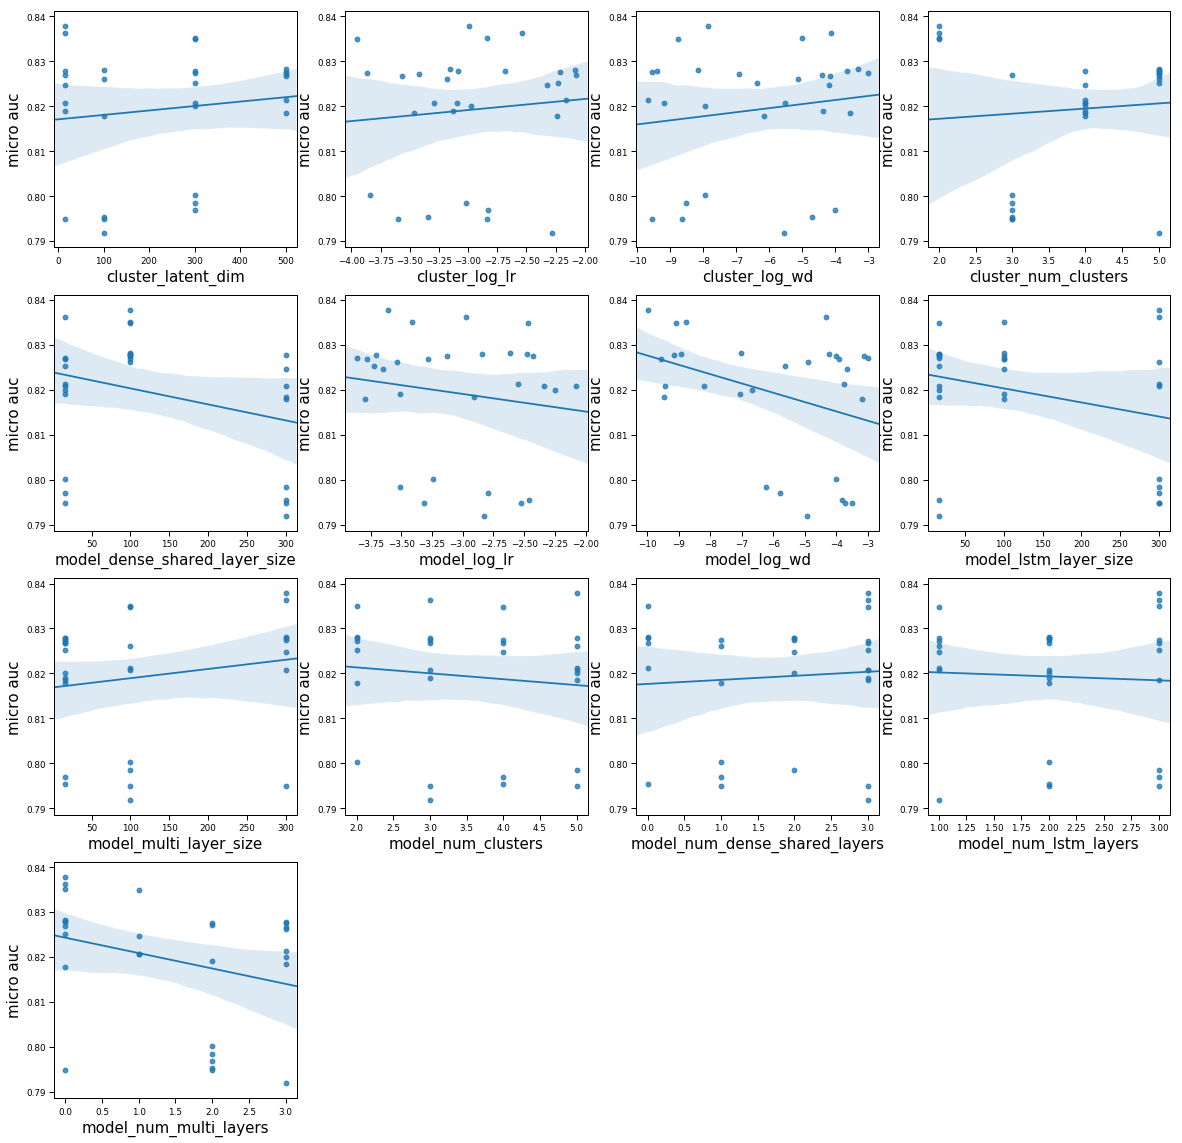

In [113]:
exp_names = ['mtl_od'] #['global_exp']
task_dir = 'eicu_mixture_of_experts_project/mortality/'
runnames = list(range(30))

val_dfs = get_val_dfs(exp_names, task_dir, runnames)
settings_df = get_settings_df(task_dir)

for exp_name in exp_names:
    print(exp_name)
    plot_hp_dependence(val_dfs, settings_df, exp_name)

In [114]:
settings_df

,cluster_latent_dim,cluster_log_lr,cluster_log_wd,cluster_num_clusters,model_dense_shared_layer_size,model_log_lr,model_log_wd,model_lstm_layer_size,model_multi_layer_size,model_num_clusters,model_num_dense_shared_layers,model_num_lstm_layers,model_num_multi_layers
0,300.0,-3.093259,-9.190304,4.0,300.0,-2.075536,-8.200097,16.0,100.0,5.0,3.0,1.0,1.0
1,16.0,-3.125652,-4.385773,4.0,16.0,-3.509043,-7.049606,100.0,16.0,3.0,3.0,2.0,2.0
2,16.0,-2.989873,-7.843394,2.0,100.0,-3.604615,-9.994128,300.0,300.0,5.0,3.0,3.0,0.0
3,100.0,-3.184360,-5.126398,5.0,100.0,-3.532347,-4.899833,300.0,100.0,5.0,1.0,1.0,3.0
4,300.0,-3.841589,-7.941787,3.0,16.0,-3.243031,-4.022331,300.0,100.0,2.0,1.0,2.0,2.0
5,100.0,-2.237920,-6.171314,4.0,300.0,-3.796074,-3.182863,100.0,16.0,2.0,1.0,2.0,0.0
6,100.0,-2.280573,-5.554448,5.0,300.0,-2.826992,-4.946838,16.0,100.0,3.0,3.0,1.0,3.0
7,300.0,-3.864540,-3.016979,5.0,100.0,-3.127030,-4.006663,16.0,16.0,4.0,1.0,3.0,3.0
8,16.0,-2.070952,-4.404730,3.0,100.0,-3.284367,-3.926219,100.0,16.0,4.0,3.0,3.0,0.0
9,500.0,-2.158717,-9.683399,4.0,16.0,-2.548510,-3.744168,300.0,100.0,5.0,0.0,1.0,3.0
